# Updating Conjugate *Prior Distributions* of Posteriori Probability Distribution
---
### *Posterior Distribution* = (*Prior Distribution* x *Likelihood Function*) / (*Evidence*)

## **Bayesian Inference**: Update Probability as New Data is Gathered
- combine two different distributions (likelihood and prior) into one 'smarter' distribution (posterior)

### Import Libraries

In [1]:
import numpy as np 
np.set_printoptions(threshold=100)

import scipy.stats as stats 

from matplotlib import pyplot as plt


# Bayesian Coin Flip
---
---
#### [Bayesian Inference](https://towardsdatascience.com/bayesian-inference-intuition-and-example-148fd8fb95d6)
#### [Conjugate Prior](https://towardsdatascience.com/conjugate-prior-explained-75957dc80bfb)

### Define Dataset and Parameters (theta = Θ)

In [2]:
success_prob = 0.3
# Success = 1, Failure = 0
data = np.random.binomial(n=1,p=success_prob,size=1000)
# Probability of Success on a Given Trial
# Evenly Spaced Parameter Range from 0%-100%
theta_range = np.linspace(0,1,1000)

### Prior Distribution (P(Θ))
- **Conjugate Prior**: chosen *Prior Distribution* for the *Likelihood Function* = a *Posterior Distribution* the same as the *Prior Distribution* 
    - Allows you to skip `posterior = likelihood * prior` computation (if you know it is a conjugate prior)
    - implied *closed-form expression* for the *prior disribution* (you already know what the maximum posterior will be)
        - *Closed-Form Expression* = finite number of standard operations

In [3]:
# Postiive Parameters 
Alpha = 2
Beta = 8

# Add Prior Period's Theta
theta_range_prior = theta_range + 0.0001

# Beta Distribution: probability distribution on probabilities 
    # Conjugate Prior Probability Distribution (for Bernoulli, Binomial(+ or -), and Geometric Distributions)
        # Beta Distribution Here is a Conjugate Prior to the Binomial Likelihood
            # We already know the Posterior will be a Beta Distribution 
            # Compute Posterior by Addong Acceptabnces and Rejections to Existing Parameters 'Alpha' and 'Beta'
# Cumulative Distribution Function (CDF): probability 'X' will take a value less than or equal to 'x'
prior = stats.beta.cdf(x=theta_range_prior, a=Alpha, b=Beta) - stats.beta.cdf(x=theta_range, a=Alpha, b=Beta)

### Likelihood Function (P(X|Θ)) aka `sampling distribution`

In [4]:
# Binomial Distribution: probability of 'k' successes in 'n' periods
# Probability Mass Function (PMF): probability that 'X' = 'k' successes 
    # k = number of success
    # n = number of trials 
    # p = probability of success 
likelihood = stats.binom.pmf(k=np.sum(data), n=len(data), p=theta_range)

### Posterior Distribution 
- computing the *Posterior Distribution* for every **Θ**
- end goal to find the *Maximum a Posteriori (MAP)*
- incorporating more information via sampling 
- more data you gather, the more the posterior will shift to the likelihood and less of the prior
    - more new data = original prior matters less 

In [5]:
posterior = likelihood * prior
normalized_posterior = posterior / np.sum(posterior)

## Plotting: 
---

### Plot Prior Distribution 

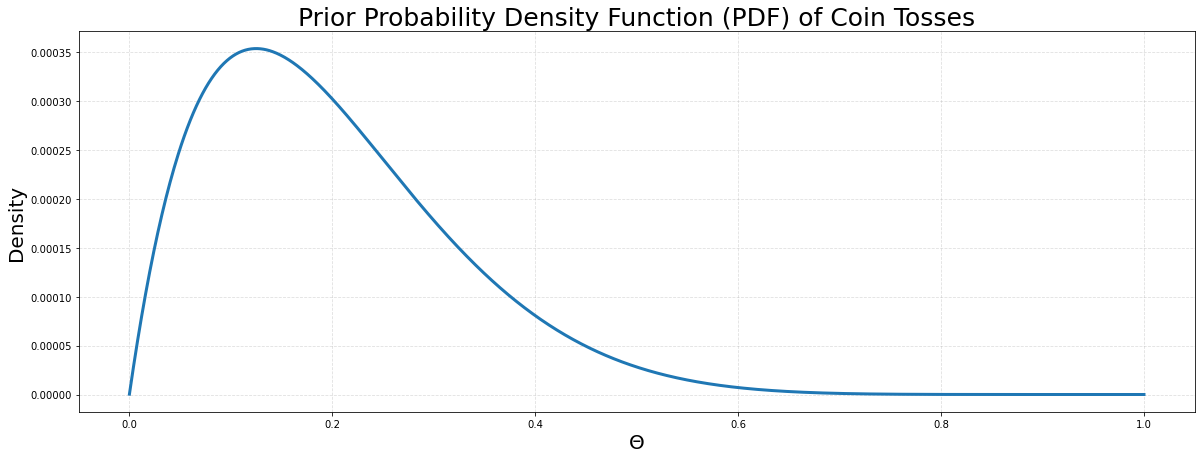

In [6]:
plt.figure(figsize=(20,7))

plt.plot(theta_range, prior, linewidth=3)

plt.title('Prior Probability Density Function (PDF) of Coin Tosses', fontsize=25)
plt.xlabel('Θ', fontsize=20)
plt.ylabel('Density', fontsize=20)

plt.grid(alpha=0.4, linestyle='--')

plt.show()

### Plot Likelihood Probability of Coin Tosses 

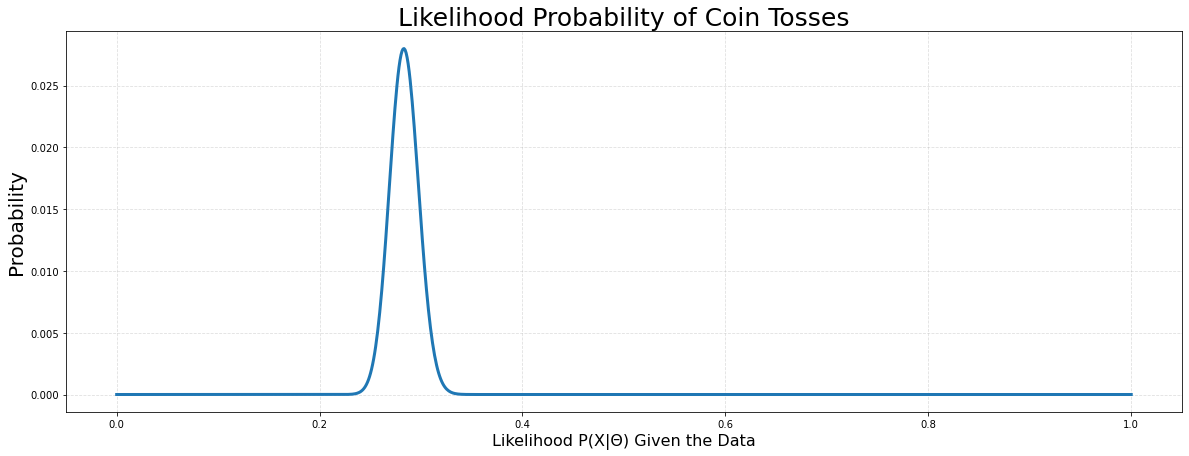

In [7]:
plt.figure(figsize=(20,7))

plt.plot(theta_range, likelihood, linewidth=3)

plt.title('Likelihood Probability of Coin Tosses', fontsize=25)
plt.xlabel('Likelihood P(X|Θ) Given the Data', fontsize=16)
plt.ylabel('Probability', fontsize=20)

plt.grid(alpha=0.4, linestyle='--')

plt.show()

### Plot Posterior 

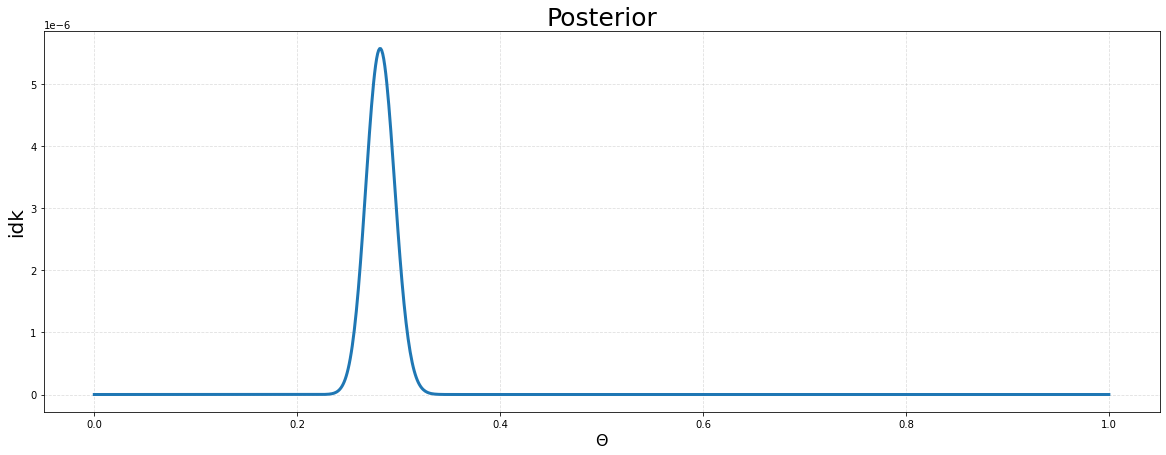

In [8]:
plt.figure(figsize=(20,7))

plt.plot(theta_range, posterior, linewidth=3)

plt.title('Posterior', fontsize=25)
plt.xlabel('Θ', fontsize=16)
plt.ylabel('idk', fontsize=20)

plt.grid(alpha=0.4, linestyle='--')

plt.show()

### Plot all Three Together

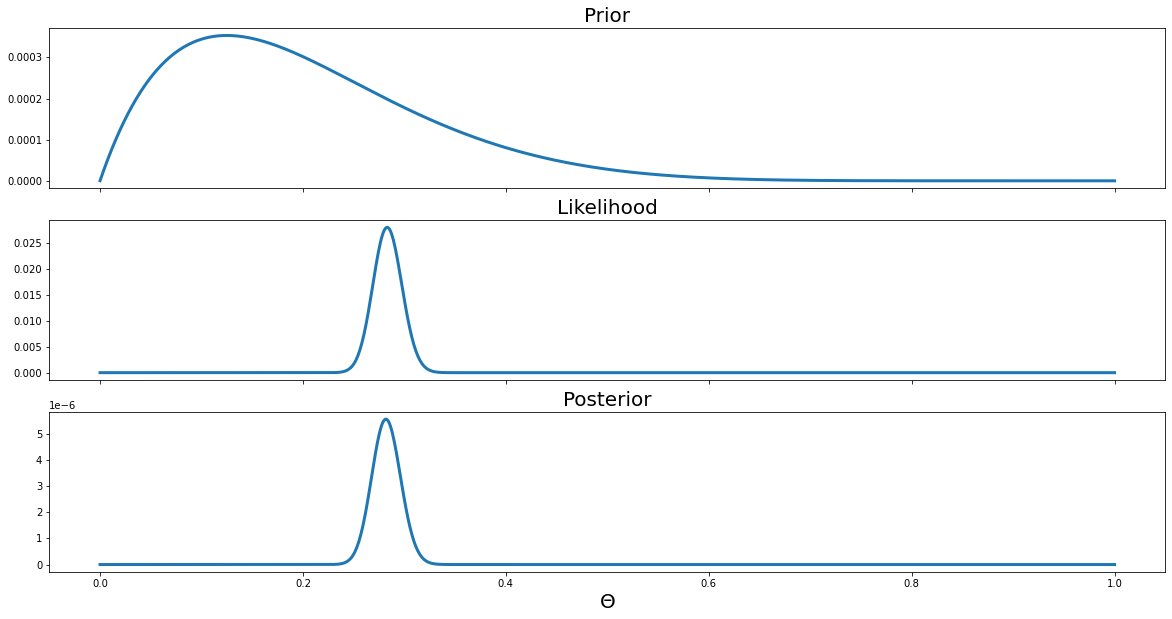

In [9]:
fig, axes = plt.subplots(3,1, sharex=True, figsize=(20,10))
plt.xlabel('Θ', fontsize=20)

axes[0].plot(theta_range, prior, label='Prior', linewidth=3)
axes[0].set_title("Prior", fontsize=20)

axes[1].plot(theta_range, likelihood, label='Likelihood', linewidth=3)
axes[1].set_title("Likelihood", fontsize=20)

axes[2].plot(theta_range, posterior, label="Posterior", linewidth=3)
axes[2].set_title("Posterior", fontsize=20)

plt.show()